# CME538 - Introduction to Data Science
## Lecture 4.3 - Visualization II

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Scale

In [8]:
pp_data = pd.DataFrame({'Cancer Screening': [2007371, 935573], 
                        'Abortions': [289750, 327000]}, 
                       index=pd.Series([2006, 2013], 
                       name='Year'))
pp_data

,Cancer Screening,Abortions
Year,,
2006,2007371,289750
2013,935573,327000


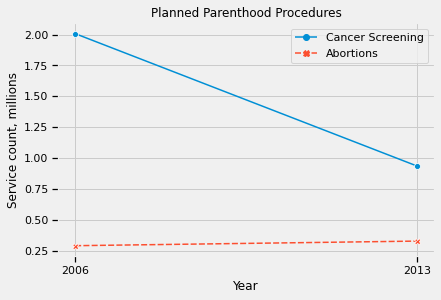

In [9]:
ax = sns.lineplot(data=pp_data / 10**6, markers=True)
ax.set_title('Planned Parenthood Procedures')
ax.set_xticks([2006, 2013])
ax.set_ylabel('Service count, millions')
plt.show()

In [10]:
rel_change = 100*(pp_data.loc[2013] - pp_data.loc[2006]) / pp_data.loc[2006]
rel_change.name = 'Percent Change'
rel_change

Cancer Screening   -53.39312
Abortions           12.85591
Name: Percent Change, dtype: float64

Text(0.5, 1.0, 'Percent Change in Number of Procedures')

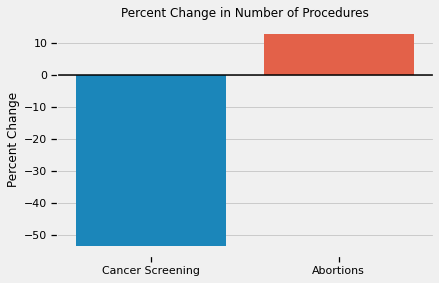

In [11]:
ax = sns.barplot(x=rel_change.index, y=rel_change)
ax.axhline(0, color='black')
ax.set_title('Percent Change in Number of Procedures')

In [21]:
pp_data 

,Cancer Screening,Abortions
Year,,
2006,2007371,289750
2013,935573,327000


In [25]:
2007371/2297121

0.8738638495751856

In [30]:
935573/2297121

0.40728067872785106

In [ ]:
935573/1262573

In [33]:
pp_data.sum(axis=1)

Year
2006    2297121
2013    1262573
dtype: int64

In [37]:
composition = pp_data.copy()
composition.iloc[0] = composition.iloc[0] / pp_data.iloc[0].sum() * 100
composition.iloc[1] = composition.iloc[1] / pp_data.iloc[1].sum() * 100
composition = composition.reset_index()
composition = composition.melt(id_vars='Year').rename(columns=str.title)
composition

,Year,Variable,Value
0,2006,Cancer Screening,87.386385
1,2013,Cancer Screening,74.100507
2,2006,Abortions,12.613615
3,2013,Abortions,25.899493


Text(0, 0.5, 'Percentage of Annual Services')

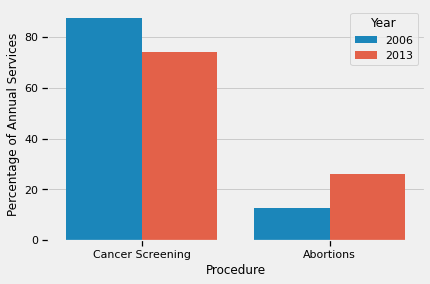

In [38]:
ax = sns.barplot(data=composition, x='Variable', y='Value', hue='Year')
ax.set_xlabel('Procedure')
ax.set_ylabel('Percentage of Annual Services')

# Conditioning

In [8]:
earnings_data = pd.read_csv('median_weekly_earnings.csv')
earnings_data

,educ,gender,income
0,1,Men,517
1,1,Women,409
2,2,Men,751
3,2,Women,578
4,3,Men,872
5,3,Women,661
6,4,Men,1249
7,4,Women,965
8,5,Men,1385
9,5,Women,1049


In [9]:
earnings_data = earnings_data.replace({'educ':{1:"<HS", 2:"HS", 3:"<BA", 4:"BA", 5:">BA"}})
earnings_data.columns = ['Education', 'Gender', 'Income']
earnings_data

,Education,Gender,Income
0,<HS,Men,517
1,<HS,Women,409
2,HS,Men,751
3,HS,Women,578
4,<BA,Men,872
5,<BA,Women,661
6,BA,Men,1249
7,BA,Women,965
8,>BA,Men,1385
9,>BA,Women,1049


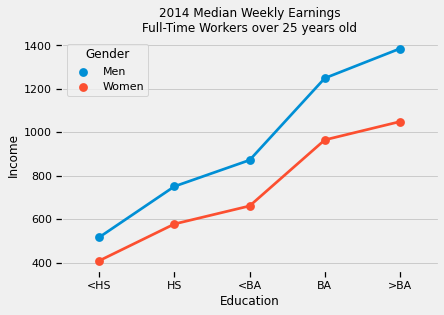

In [10]:
blue_red = ["#397eb7", "#bf1518"]
ax = sns.pointplot(data=earnings_data, x = "Education", y = "Income", hue = "Gender")
ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");

In [11]:
cg = earnings_data.set_index("Education").groupby("Gender")
men = cg.get_group("Men").drop("Gender", "columns")
women = cg.get_group("Women").drop("Gender", "columns")
display(men, women)

,Income
Education,
<HS,517
HS,751
<BA,872
BA,1249
>BA,1385


,Income
Education,
<HS,409
HS,578
<BA,661
BA,965
>BA,1049


In [12]:
mfratio = men/women
mfratio.columns = ["Income Ratio (M/F)"]
mfratio

,Income Ratio (M/F)
Education,
<HS,1.264059
HS,1.299308
<BA,1.319213
BA,1.294301
>BA,1.320305


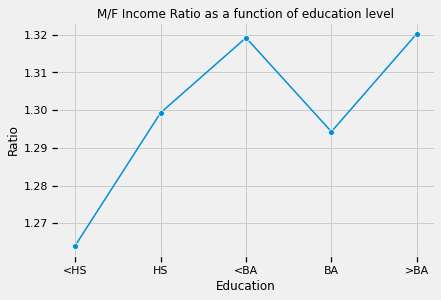

In [13]:
ax = sns.lineplot(data=mfratio, markers=True, legend=False);
ax.set_ylabel("Ratio")
ax.set_title("M/F Income Ratio as a function of education level");

In [14]:
fmratio = women/men
fmratio.columns = ["Income Ratio (F/M)"]
fmratio

,Income Ratio (F/M)
Education,
<HS,0.791103
HS,0.769640
<BA,0.758028
BA,0.772618
>BA,0.757401


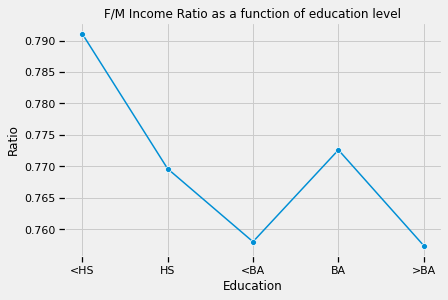

In [15]:
ax = sns.lineplot(data=fmratio, markers=True, legend=False);
ax.set_ylabel("Ratio")
ax.set_title("F/M Income Ratio as a function of education level");